## 0. Computer vision libraries in PyTorch
* `torchvision` - base domain library for pytorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your images to be suitable for use with model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.Dataloader` - creates a Python iterable over a dataset

In [5]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms

# Import matplotlib
import matplotlib.pyplot as plt

## 1. Getting a dataset

The dataset that will be used is the FashionMNIST from torchvision.datasets

In [7]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download to
    train=True, # get the training dataset
    download=True, # want to download
    transform=torchvision.transforms.ToTensor(), # how do we want to transform data'
    target_transform=None # how do we want to transform labels/targets
)

test_data = datasets.FashionMNIST(
    root="data", # where to download to
    train=False, # get the testing dataset
    download=True, # want to download
    transform=torchvision.transforms.ToTensor(), # how do we want to transform data'
    target_transform=None # how do we want to transform labels/targets
)

In [8]:
len(train_data), len(test_data)

(60000, 10000)

In [9]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [10]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [11]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [12]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

### 1.2 Visualizing our data


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

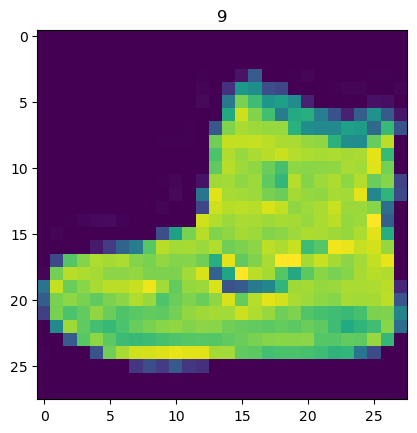

In [14]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

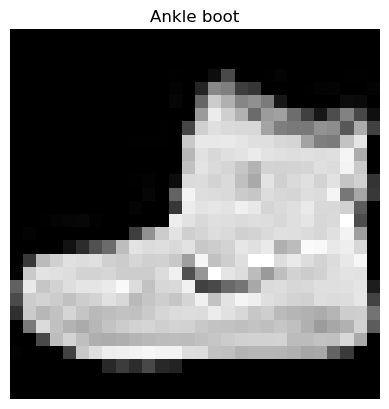

In [15]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

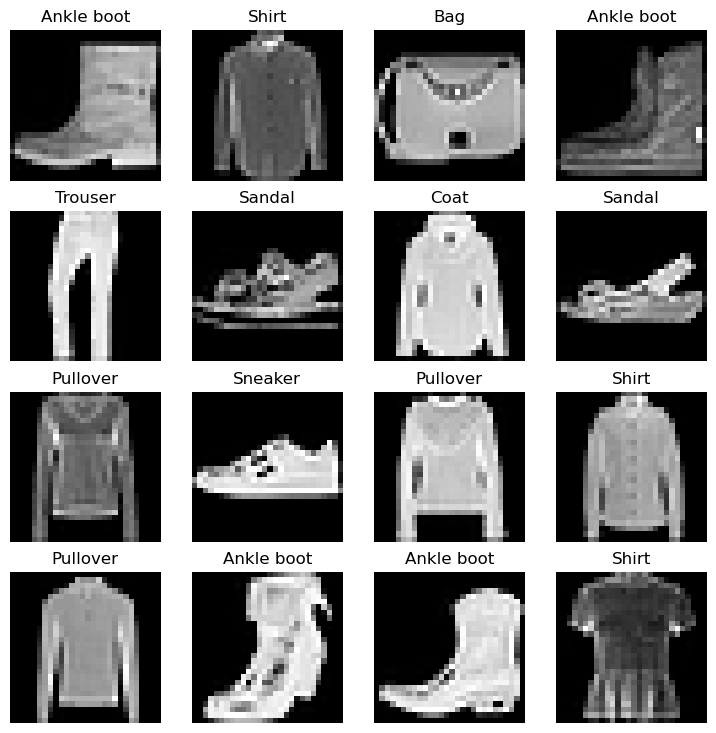

In [16]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 2. Prepare DataLoader

Data currently in the form of PyTorch Datasets

DataLoader turns the dataset into a Python iterable

Want to turn our data into batches (or mini-batches) because:
1. More computationally efficient - hardware may not be able to store 60,000 images in memory at one time. Break it down to 32 images at a time -> batch size of 32
2. Gives the neural network more chances to update its gradients per epoch

In [18]:
from torch.utils.data import DataLoader

# Setup batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x29d903daba0>,
 <torch.utils.data.dataloader.DataLoader at 0x29da82a11c0>)

In [19]:
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [20]:
# What is inside train_dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])


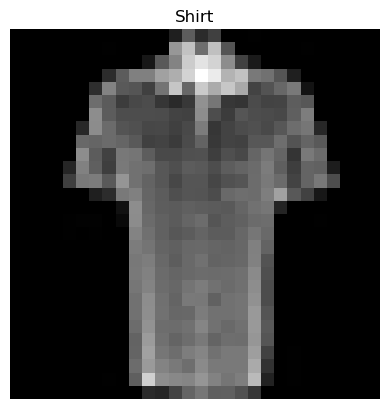

In [21]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, its best practice to start with a baseline model.

A baseline model is a simple model you wil try to improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [23]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [24]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, 
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape))

    def forward(self, x):
        return self.layer_stack(x)

In [25]:
torch.manual_seed(42)

# Setup model 
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [26]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Set up loss, optimizer, and evaluation metrics
* Loss function - `nn.CrossEntropyLoss()` because this is multi-class data
* Optimizer - `torch.optim.SGD()`
* Evaluation Metric - since it is a classification problem, we can use accuracy as an evaluation metric

In [28]:
from helper_functions import accuracy_fn

In [29]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

Often want to track:
1. Model's performance (loss, accuracy, etc)
2. How fast the model runs

In [31]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """ prints difference between start and end time"""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.

In [33]:
from fastprogress.fastprogress import progress_bar

In [34]:
# Set the seed
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

# Create training and test loop
for epoch in progress_bar(range(epochs)):
    print(f"Epoch: {epoch} \n-------")
    
    ### Training
    train_loss = 0 # total loss for batch
    
    # Add a loop to loop through the batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")
            
    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate loss
            test_loss += loss_fn(test_pred, y_test)

            #3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
            
        # Calculate test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate test acc average per batch
        test_acc /= len(test_dataloader)

    # Print out whats happening
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_0.parameters()).device))

Epoch: 0 
-------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1 
-------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2 
-------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 54.389 seconds


## 4. Evaluate model_0 results

In [47]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [49]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module,
               device:torch.device=device,
               accuracy_fn=accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader"""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in progress_bar(data_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # find avg loss and acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
           "model_loss": loss.item(),
           "model_acc": acc} # only works when model was created with a class

In [51]:
model_0.to(device)

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [53]:
model_0_results = eval_model(model=model_0, 
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [55]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## 6. Model 1: Building a better model with non-linearity

In [58]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units: int, 
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)

In [60]:
# Create instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

### 6.1 Loss, optimizer, and evaluation metrics

In [63]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Lets create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [174]:
def train_step(model:nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn=accuracy_fn,
               device: torch.device = device):
    """Performs training step"""
    train_loss, train_acc = 0, 0
    
    model.train()
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()
                
        loss.backward()
        
        optimizer.step()
        
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [176]:
def test_step(model: nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn:nn.Module,
              accuracy_fn=accuracy_fn,
              device:torch.device = device):
    """Performs testing step"""

    test_loss, test_acc = 0, 0

    model.eval()

    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")
            
            

In [70]:
torch.manual_seed(42)

# Measure time
start_train_time_gpu = timer()

# Set Epochs
epochs = 3

# Create an optimization and evaluation loop using the functions above
for epoch in progress_bar(range(epochs)):
    print(f"Epoch: {epoch}\n----------")
    train_step(model=model_1,
              dataloader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn)
    
    test_step(model=model_1,
             dataloader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn)

stop_train_time_gpu = timer()
total_train_time_model_1 = print_train_time(start=start_train_time_gpu, 
                                    end=stop_train_time_gpu, 
                                    device=device)

Epoch: 0
----------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%
Epoch: 1
----------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%
Epoch: 2
----------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%
Train time on cuda: 42.471 seconds


In [71]:
model_1_results = eval_model(model=model_1,
                              data_loader=test_dataloader,
                              loss_fn=loss_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

## 7. Model 2: Building a Convolutional Neural Network (CNN)
CNN's also known as ConvNets

CNN's are very capable in finding patterns in visual data

In [179]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """Model architecture that replicates the TinyVGG architecture from the CNN explainer website."""
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3,
                      stride=1,
                      padding=1
                     ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1
                     ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # Trick to calculating this
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [146]:
image.shape

torch.Size([1, 28, 28])

In [182]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # 1 because our images are gray scale
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # 10 because TinyVGG has 10 neurons in Conv layer
                                

In [184]:
rand_image_tensor = torch.randn(size=(1, 1, 28, 28)).to(device)
rand_image_tensor.shape

torch.Size([1, 1, 28, 28])

In [186]:
# Pass image through model
model_2(rand_image_tensor)

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

In [188]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [190]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, 
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=0)

# Pass data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Stepping through `nn.MaxPool2d()`

In [193]:
test_image.shape

torch.Size([3, 64, 64])

In [195]:
# Print out original image shape without unsqueeze dimension
print(f"Test image original shape: {test_image.shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv layer
test_image_thru_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_thru_conv.shape}")

# Pass data through max pool layer
test_image_thru_conv_and_pool = max_pool_layer(test_image_thru_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_thru_conv_and_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([10, 31, 31])


In [197]:
torch.manual_seed(42)
# Create a random tensor with similiar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nRandom tensor:\n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")



Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for mode_2

In [200]:
#Set up loss function/eval metrics/optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### 7.4 Training and testing model_2 using train and test functions

In [204]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
start_time_model_2 = timer()

# Train and test model
epochs = 3
for epoch in progress_bar(range(epochs)):
    print(f"Epoch: {epoch}\n--------------")
    train_step(model=model_2,
              dataloader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    test_step(model=model_2,
             dataloader=test_dataloader,
             loss_fn=loss_fn)

    end_time_model_2 = timer()
    total_train_time_model_2 = print_train_time(start=start_time_model_2, end=end_time_model_2, device=device)
    

Epoch: 0
--------------
Train loss: 0.58780 | Train acc: 78.63%
Test loss: 0.39676 | Test acc: 85.85%
Train time on cuda: 17.235 seconds
Epoch: 1
--------------
Train loss: 0.36238 | Train acc: 86.93%
Test loss: 0.34850 | Test acc: 86.98%
Train time on cuda: 33.546 seconds
Epoch: 2
--------------
Train loss: 0.32573 | Train acc: 88.12%
Test loss: 0.32590 | Test acc: 88.21%
Train time on cuda: 49.974 seconds


In [208]:
# Get model_2 results
model_2_results = eval_model(model=model_2, data_loader=test_dataloader, loss_fn=loss_fn)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3258979618549347,
 'model_acc': 88.20886581469648}

## 8. Comparing model results and training time

In [215]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.325898,88.208866


Text(0, 0.5, 'model')

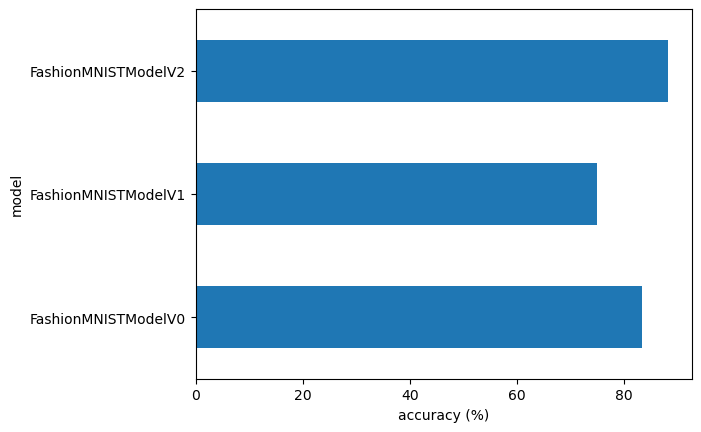

In [219]:
# Visualize model results
compare_results.set_index("model_name")["model_acc"].plot(kind='barh')
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [254]:
def make_predictions(model: torch.nn.Module, 
                    data: list,
                    device=device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = sample.unsqueeze(dim=0).to(device) # unsqueeze to add a batch dimension
            
            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Prediction probability
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_probs off gpu for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [256]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9): # k=9 means get 9 random samples
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

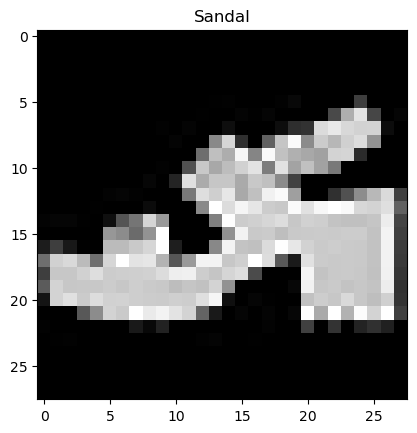

In [257]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [260]:
# Make predictions
pred_probs = make_predictions(model=model_2, data=test_samples)

# View the first two prediction probabilities
pred_probs[:2]

tensor([[8.0473e-09, 6.5025e-09, 3.0019e-09, 1.8234e-08, 1.4835e-10, 9.9998e-01,
         4.3021e-08, 2.4630e-06, 2.0996e-06, 1.4855e-05],
        [2.9813e-02, 6.6382e-01, 6.6030e-04, 1.1959e-01, 6.9300e-02, 4.1067e-05,
         1.1627e-01, 1.6972e-04, 2.3407e-04, 1.0263e-04]])

In [270]:
# Convert prediction probs to label
pred_labels = torch.argmax(pred_probs, dim=1)
pred_labels

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [272]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

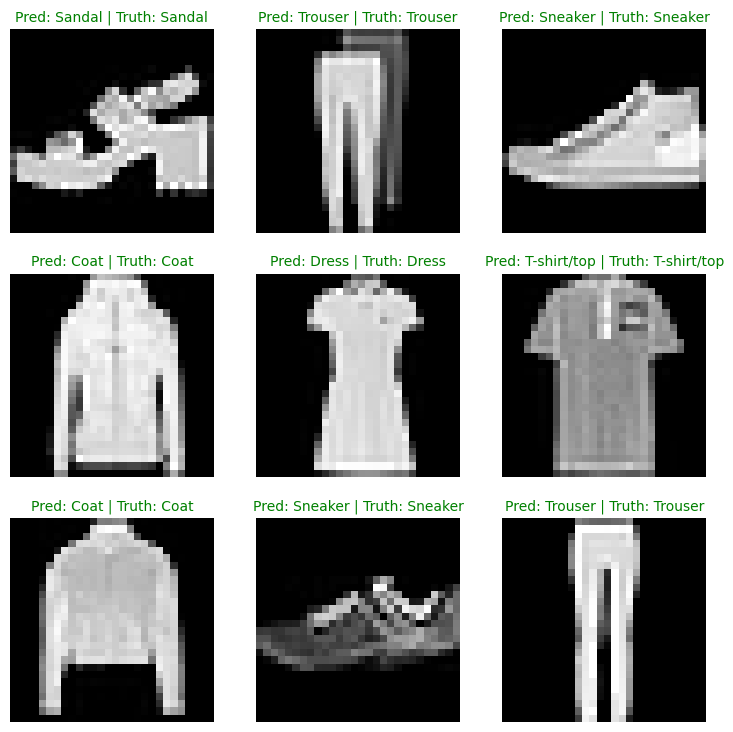

In [284]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i + 1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction label (in text form)
    pred_label = class_names[pred_labels[i]]

    # Get the truth label
    truth_label = class_names[test_labels[i]]

    # Create title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") # green text if pred is correct
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a way of evaluating your classification model visually

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix with `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [308]:
# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in progress_bar(test_dataloader):
        X, y = X.to(device), y.to(device)
        y_logits = model_2(X)
        # Turn from logits -> pred probs -> pred labels
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
        # Put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())
        
# Appending to y_preds at end of every batch therefore adding a tensor of length 32 to y_pred for every batch -> cat will combine all those tensors into just one tensor
print(y_preds[:5])
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

[tensor([9, 2, 1, 1, 6, 4, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0, 2, 5, 7, 5,
        1, 6, 6, 0, 9, 4, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 9, 6, 7, 2, 3, 6, 6, 4, 2, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 1, 3, 3, 7, 8, 7, 0, 2, 3, 2, 3, 1, 2, 8, 4, 4, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 1, 6]), tensor([6, 1, 6, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 6, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 4, 8, 6, 6, 1, 2, 5, 1, 6, 0, 0, 4, 6, 1, 3, 2, 2, 2, 4,
        1, 4, 5, 6, 4, 7, 9, 3])]


tensor([9, 2, 1, 1, 6, 4, 4, 6, 5, 7])

In [310]:
len(y_pred_tensor)

10000

In [314]:
from torchmetrics import ConfusionMatrix
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

In [322]:
# 2. Set up confusion matrix instance and compare preds to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor, 
                        target=test_data.targets)

confmat_tensor

tensor([[643,   6,  41,  86,   9,   1, 208,   0,   6,   0],
        [  5, 903,   5,  55,  22,   0,   7,   1,   2,   0],
        [  8,   4, 800,  16,  98,   0,  69,   0,   5,   0],
        [ 36,  16,  25, 836,  51,   0,  24,   0,  10,   2],
        [  8,   5, 121,  43, 702,   0, 118,   0,   3,   0],
        [  7,   2,  11,   3,   0, 832,   5,  51,  61,  28],
        [ 69,   7, 124,  70,  82,   0, 633,   0,  15,   0],
        [  2,   2,   0,   0,   0,  29,   0, 910,  10,  47],
        [  7,   2,  15,  11,   9,   4,  33,   8, 911,   0],
        [  0,   1,   1,   2,   0,  21,   2,  85,   8, 880]])

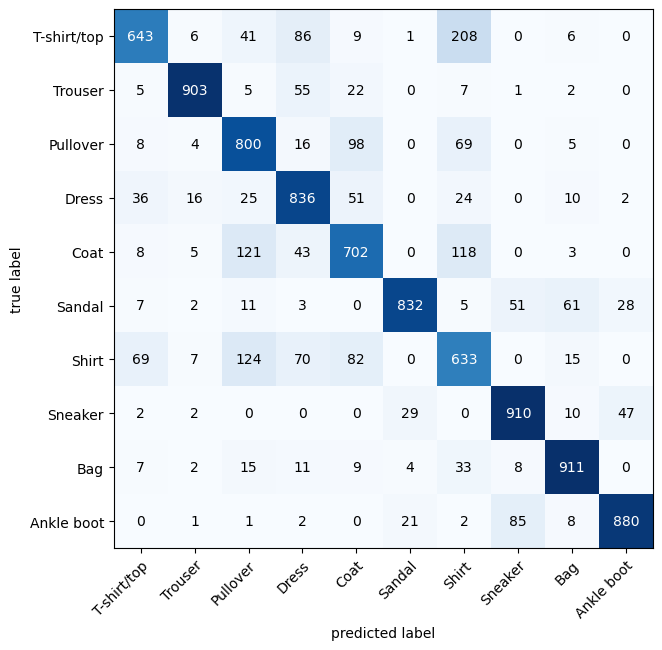

In [326]:
# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib needs numpy array
    class_names=class_names,
    figsize=(10, 7)
)

## 11. Save and Load best model

In [333]:
from pathlib import Path

In [344]:
PATH = Path("./models/first_convnet.pt")
torch.save(model_2.state_dict(), PATH)